# camera

- 위치를 찾아내는 기술 randmark, alignment
- keypoint detection 
   

1. 얼굴이 포함된 사진을 준비하고
2. 사진으로부터 얼굴 영역 face landmark 를 찾아냅니다. (landmark를 찾기 위해서는 얼굴의 bounding box를 먼저 찾아야합니다.)
3. 찾아진 영역으로 부터 머리에 왕관 스티커를 붙여넣겠습니다.


- library install
``` pip install opencv-python ```

## library install

In [2]:
!pip install opencv-python
!pip install cmake
!pip install dlib

     |████████████████████████████████| 18.2 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 527 kB/s eta 0:00:01
  Created wheel for dlib: filename=dlib-19.21.0-cp37-cp37m-linux_x86_64.whl size=4180870 sha256=f5b7aefb2a4af31d8da4a662a3057e2b5ef3bf56b49aa999c67d5ae0bc27fbc1
  Stored in directory: /home/aiffel0042/.cache/pip/wheels/d8/8f/ac/70af71fd636fb03b238ca3f183e64f5dfdb5e4ffffeff89ce6
Successfully built dlib


## library import

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import os

## data import
- 이미지 다루기
- https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

In [6]:
img_bgr = cv2.imread("./imgs/f1.jpg")
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy() # 출력용 이미지 복사

- cv2.IMREAD_COLOR(1) : 이미지 파일을 Color로 읽음. 투명한 부분은 무시하며 Default 설정입니다
- cv2.IMREAD_GRAYSCALE(0) : 이미지 파일을 Grayscale로 읽음. 실제 이미지 처리시 중간 단계로 많이 사용합니다
- cv2.IMREAD_UNCHAGED(-1) : 이미지 파일을 alpha channel 까지 포함해 읽음

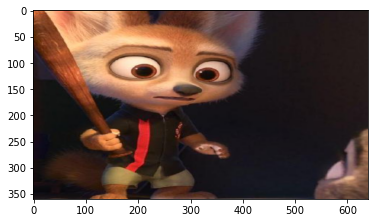

In [5]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## face dectection

In [6]:
#hog detctor 선언

import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [7]:
#img_bgr = cv2.imread('/home/aiffel0042/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E10-camera_sticker_app/imgs/f2jpg')
img_bgr = cv2.imread('./imgs/f2.jpg')
img_show = img_bgr.copy() # 출력용 이미지 복사

# 얼굴 bounding box를 추출 


img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # dlib rgb 이미지 입력을 받기 때문에 변환
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

# 이미지를 upsampling 방법을 통해 크기를 키우는 것을 이미지 피라미드

rectangles[[(236, 116) (390, 270)]]


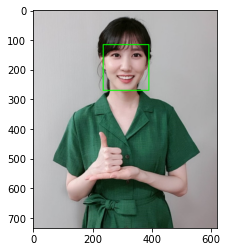

In [8]:

print(dlib_rects)   # 찾은 얼굴영역 좌표 
# dlib.rectangles 타입의 객체

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## face landmark
- face dectection 으로 잘라낸 얼굴 이미지 사용


### Object keypoint estimation 알고리즘
- Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다. keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

### Dlib landmark localization
- 68개의 이목구비 위치를 찾음.
- ibug 300-w 데이터셋으로 학습한(pretrained model) 제공 
- https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/
- 알고리즘 관련 https://www.cv-foundation.org/openaccess/content_cvpr_2014/papers/Kazemi_One_Millisecond_Face_2014_CVPR_paper.pdf
![](./imgs/03-dll.png)

- dataset 마다 개수는 다름
- AFLW 데이터셋은 21개를 사용하고 ibug 300w 데이터셋은 68개를 사용


###  dlib 제공 모델 다운로드

In [9]:
#!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
#!mv shape_predictor_68_face_landmarks.dat.bz2 ./data/

In [10]:
### 모델 import
import os

#model_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E10-camera_sticker_app/data/shape_predictor_68_face_landmarks.dat'
model_path = './data/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [11]:
#landmark_predictor , rgb 이미지와 얼굴 rect를 좌표를 받아서 

print(dlib_rects)
list_landmarks = []
#for dlib_rect in dlib_rects:
#print(dlib_rect)
points = landmark_predictor(img_rgb, dlib_rects[0])
print("points", points)
print("points", points.parts())
list_points = list(map(lambda p: (p.x, p.y), points.parts()))
list_landmarks.append(list_points)

print(len(list_landmarks[0]))

rectangles[[(236, 116) (390, 270)]]
points <_dlib_pybind11.full_object_detection object at 0x7fc09cb844b0>
points points[(238, 155), (240, 174), (243, 193), (247, 212), (253, 230), (264, 245), (277, 259), (293, 271), (310, 275), (327, 272), (343, 260), (356, 245), (367, 229), (373, 212), (378, 193), (381, 174), (383, 156), (253, 142), (262, 133), (274, 129), (288, 130), (300, 135), (327, 135), (340, 130), (353, 129), (366, 132), (375, 142), (313, 152), (313, 167), (312, 182), (311, 198), (297, 204), (304, 206), (312, 209), (319, 207), (327, 204), (268, 153), (276, 148), (286, 149), (294, 157), (285, 157), (275, 156), (333, 157), (341, 149), (351, 148), (360, 153), (352, 156), (342, 157), (282, 221), (293, 218), (304, 217), (313, 219), (321, 217), (332, 219), (342, 222), (332, 237), (321, 244), (312, 245), (303, 243), (292, 235), (285, 222), (304, 222), (313, 223), (321, 222), (339, 223), (321, 234), (312, 235), (304, 234)]
68


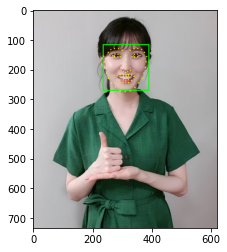

In [12]:

#사진에 점찍기....

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 머리위에 올리기

### 스티커 위치
- x = x
- y = y - w/2


In [37]:
## 좌표 확인
print("dlib_rects", dlib_rects)
print("list_landmarks", list_landmarks)
print("\n\n\n\n")


# 30번 코 점ㅊ
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] # 코에 x 좌표(왕관 x)
    y = landmark[30][1] - dlib_rect.width()//2 
    # 코에 y 좌표에서 얼굴 랜드마크 네모 y 크기 절만 만큼 위로.(왕관x)
    
    # 랜드마크얼굴 네모 크기
    w = dlib_rect.width()
    h = dlib_rect.height() 
    
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

dlib_rects rectangles[[(236, 116) (390, 270)]]
list_landmarks [[(238, 155), (240, 174), (243, 193), (247, 212), (253, 230), (264, 245), (277, 259), (293, 271), (310, 275), (327, 272), (343, 260), (356, 245), (367, 229), (373, 212), (378, 193), (381, 174), (383, 156), (253, 142), (262, 133), (274, 129), (288, 130), (300, 135), (327, 135), (340, 130), (353, 129), (366, 132), (375, 142), (313, 152), (313, 167), (312, 182), (311, 198), (297, 204), (304, 206), (312, 209), (319, 207), (327, 204), (268, 153), (276, 148), (286, 149), (294, 157), (285, 157), (275, 156), (333, 157), (341, 149), (351, 148), (360, 153), (352, 156), (342, 157), (282, 221), (293, 218), (304, 217), (313, 219), (321, 217), (332, 219), (342, 222), (332, 237), (321, 244), (312, 245), (303, 243), (292, 235), (285, 222), (304, 222), (313, 223), (321, 222), (339, 223), (321, 234), (312, 235), (304, 234)]]





(311, 198)
(x,y) : (311,121)
(w,h) : (155,155)


In [20]:

## 스티커 로드, 
#sticker_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/01-EXPLORATION/E10-camera_sticker_app/imgs/00-crown_01.png'
sticker_path = './imgs/00-crown_01.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h)) # 리사이즈. 왕관사이즈만큼... 얼굴크기 맞추려고 하는듯.
print (img_sticker.shape)

(155, 155, 3)


In [21]:
# 스티커 위치. 조정 시작점.
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# y - 찍힘. ...이미지 밖으로 나갈수 도 있음.



(x,y) : (234,-34)


In [24]:
# 원본이미지에서 벗어난 y좌표만큼 .왕관 이미지 crop 컷컷컷
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(121, 155, 3)


In [25]:
#좌표 수정
# x는 조정값으로 y는 최상단이기 때매 0
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (234,0)


In [35]:
#원본 스티거에 적용

print("img_sticker.shape: ", img_sticker.shape)
print("refined_y", refined_y)
print("img_sticker.shape[0]: ", img_sticker.shape[0])
print("refined_x", refined_x)
print("img_sticker.shape[1]: ", img_sticker.shape[1])
print("\n\n")

# 스티커 영역 : 
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

#print(sticker_area,"sticker_area")

#  조건에 맞는 값의 색인 위치: np.where()
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

img_sticker.shape:  (121, 155, 3)
refined_y 0
img_sticker.shape[0]:  121
refined_x 234
img_sticker.shape[1]:  155





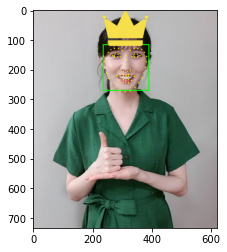

In [27]:
# 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

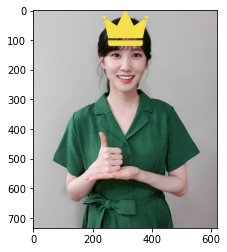

In [28]:
# landmakr 박스랑 localization 점 없이, 원본이미지에 출력
# img_bgr 원본이미지

sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()